In [147]:
import tweepy
import pandas as pd
import numpy as np
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix, accuracy_score
from yellowbrick.text import TSNEVisualizer
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve

In [148]:
data = pd.read_csv('datacovid19clean.csv',encoding='utf-8',error_bad_lines=False)

In [149]:
data.klasifikasi.replace(['negative','positive'],[0,1],inplace=True)
data.head()

,Unnamed: 0,tweet,klasifikasi,tweet_tokens,tweet_tokens_fdist,tweet_tokens_WSW,Text_normalisasi,Text_bersih
0,0,waspada covid melandai waspada tukang jualan v...,0,"['waspada', 'covid', 'melandai', 'waspada', 't...",<FreqDist with 15 samples and 16 outcomes>,"['waspada', 'covid', 'melandai', 'waspada', 't...","['waspada', 'covid', 'melandai', 'waspada', 't...","['waspada', 'covid', 'landai', 'waspada', 'tuk..."
1,1,sudah vaksin dosis kenapa harus rest pcr untuk...,0,"['sudah', 'vaksin', 'dosis', 'kenapa', 'harus'...",<FreqDist with 10 samples and 10 outcomes>,"['vaksin', 'dosis', 'rest', 'pcr', 'syarat', '...","['vaksin', 'dosis', 'rest', 'pcr', 'syarat', '...","['vaksin', 'dosis', 'rest', 'pcr', 'syarat', '..."
2,2,yang tidak percaya covid tpi tetap ngikutin pr...,0,"['yang', 'tidak', 'percaya', 'covid', 'tpi', '...",<FreqDist with 12 samples and 12 outcomes>,"['percaya', 'covid', 'tpi', 'ngikutin', 'proto...","['percaya', 'covid', 'tapi', 'ngikutin', 'prot...","['percaya', 'covid', 'tapi', 'ngikutin', 'prot..."
3,3,berita tahun penuh dengan terpapar penyakit ta...,1,"['berita', 'tahun', 'penuh', 'dengan', 'terpap...",<FreqDist with 14 samples and 19 outcomes>,"['berita', 'penuh', 'terpapar', 'penyakit', 'k...","['berita', 'penuh', 'terpapar', 'penyakit', 'k...","['berita', 'penuh', 'papar', 'sakit', 'naik', ..."
4,4,yg satu pengen nguasai mars yg satu lg pengen ...,1,"['yg', 'satu', 'pengen', 'nguasai', 'mars', 'y...",<FreqDist with 21 samples and 27 outcomes>,"['pengen', 'nguasai', 'mars', 'pengen', 'angka...","['ingin', 'nguasai', 'mars', 'ingin', 'angkasa...","['ingin', 'nguasai', 'mars', 'ingin', 'angkasa..."


In [150]:
tweets_df['klasifikasi'].value_counts()

positive    4359
negative    4218
Name: klasifikasi, dtype: int64

In [151]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(tweets_df['Text_bersih'], tweets_df['klasifikasi'], test_size = 0.2)
# random_state = 0 menyatakan tidak ada pengacakan pada data yang di split yang artinya urutannya masih sama

In [152]:
data_train = pd.DataFrame()
data_train['Text_bersih'] = X_train
data_train['klasifikasi'] = y_train

data_test = pd.DataFrame()
data_test['Text_bersih'] = X_test
data_test['klasifikasi'] = y_test

In [153]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf.fit(tweets_df['Text_bersih'])
data_train_x = tfidf.transform(data_train['Text_bersih'])
data_test_x= tfidf.transform(data_test['Text_bersih'])

In [154]:
# Preprocessing and vectorizer for testing models
def preprocess_data(data):
    data = tfidf.transform([data])
    
    return data 

In [155]:
from sklearn.svm import SVC
linear = SVC(kernel='linear')
linear.fit(data_train_x,y_train)
linear1=linear.predict(data_test_x)

In [156]:
# Process of making models Klasifikasi SVM RBF
rbf = SVC(kernel='rbf')
rbf.fit(data_train_x,y_train)
rbf1 = rbf.predict(data_test_x)

In [160]:
from sklearn.metrics import accuracy_score

predictions_SVC = linear.predict(data_test_x)
test_prediction = pd.DataFrame()
test_prediction['tweet'] = test_X
test_prediction['klasifikasi'] = predictions_SVC
SVC_accuracy= accuracy_score(predictions_SVC, y_test)*100
SVC_accuracy= round(SVC_accuracy,1)
# Accuracy, Precision, Recall, f1-score

from sklearn.metrics import classification_report

print ("\nHere is the classification report:") 
print (classification_report(y_test, predictions_SVC))
# Confusion matrixSVMLinear
tn, fp, fn, tp = confusion_matrix(y_test, linear1).ravel()
print("True Positive : ", tp)
# Accuracy score
print("True Negative : ", tn)
# Precision score
print("False Positive : ", fp)
# Recall score
print("False Negative  : ", fn)
print('\n')


Here is the classification report:
              precision    recall  f1-score   support

    negative       0.87      0.85      0.86       847
    positive       0.86      0.88      0.87       869

    accuracy                           0.87      1716
   macro avg       0.87      0.87      0.87      1716
weighted avg       0.87      0.87      0.87      1716

True Positive :  764
True Negative :  724
False Positive :  123
False Negative  :  105




In [161]:
from sklearn.metrics import accuracy_score

predictions_RBF = rbf.predict(data_test_x)
test_prediction_RBF = pd.DataFrame()
test_prediction_RBF['tweet'] = test_X
test_prediction_RBF['klasifikasi'] = predictions_RBF
RBF_accuracy= accuracy_score(predictions_RBF, y_test)*100
RBF_accuracy= round(RBF_accuracy,1)
from sklearn.metrics import classification_report

print ("\nHere is the classification report:") 
print (classification_report(y_test, predictions_RBF))
# Confusion matrixSVMRBF
tn, fp, fn, tp = confusion_matrix(y_test, rbf1).ravel()
print("True Positive : ", tp)
# Accuracy score
print("True Negative : ", tn)
# Precision score
print("False Positive : ", fp)
# Recall score
print("False Negative  : ", fn)


Here is the classification report:
              precision    recall  f1-score   support

    negative       0.91      0.90      0.90       847
    positive       0.90      0.91      0.91       869

    accuracy                           0.91      1716
   macro avg       0.91      0.91      0.91      1716
weighted avg       0.91      0.91      0.91      1716

True Positive :  794
True Negative :  762
False Positive :  85
False Negative  :  75


In [144]:
#ROC Curve
#from sklearn.metrics import roc_curve
#from sklearn.metrics import roc_auc_score

#auc = roc_auc_score(data_train['klasifikasi'],y_train)
#print('Area Under Curve:', auc)
#fpr, tpr, thresholds = roc_curve(data_train['klasifikasi'], y_train_hat)
#plt.plot([0, 1], [0, 1], linestyle='--')
#plt.plot(fpr, tpr, marker='.')
#plt.title('ROC Curve')
#plt.xlabel('True Positive Rate')
#plt.ylabel('False Positive Rate')
#plt.show()

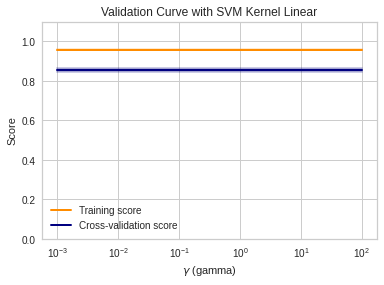

In [131]:
#Validation curve SVM Linear
param_range = np.logspace(-3, 2, 20)
train_scores, test_scores = validation_curve(SVC(kernel='linear', gamma=1, C=1), data_train_x, y_train, param_name='gamma', param_range=param_range, scoring="accuracy", n_jobs=-1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SVM Kernel Linear")
plt.xlabel(r"$\gamma$ (gamma)")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
#fig2=plt.fill_between(param_range, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2, color='navy', lw=lw)
#fig2.figure.savefig('fig2.png', bbox_inches='tight')
plt.legend(loc="best")
plt.show()

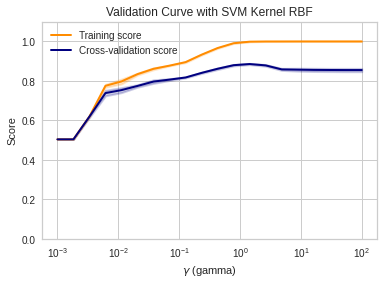

In [132]:
#Validation curve SVM RBF
param_range = np.logspace(-3, 2, 20)
train_scores, test_scores = validation_curve(SVC(kernel="rbf", gamma=1, C=1), data_train_x, y_train, param_name='gamma', param_range=param_range, scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SVM Kernel RBF")
plt.xlabel(r"$\gamma$ (gamma)")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
#fig2=plt.fill_between(param_range, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2, color='navy', lw=lw)
#fig2.figure.savefig('fig2.png', bbox_inches='tight')
plt.legend(loc="best")
plt.show()

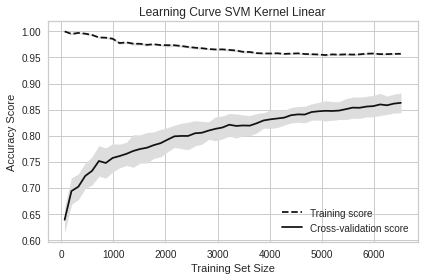

In [145]:
#Learning Curve
# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(SVC(kernel="linear", gamma=1, C=1), data_train_x, y_train, cv=20, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve SVM Kernel Linear")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

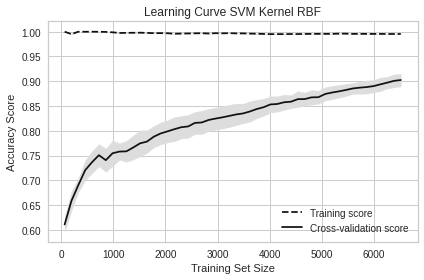

In [146]:
#Learning Curve
# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(SVC(kernel="rbf", gamma=1, C=1), data_train_x, y_train, cv=20, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve SVM Kernel RBF")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()